<a href="https://colab.research.google.com/github/kaitlynlaii/NUS_DATATHON_SINGLIFE_NUS_124/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 1. Data Preparation

### 1.1 Importing dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_parquet('catB_train.parquet')
df.head()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


In [ ]:
df.shape

(17992, 304)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17992 entries, 19550 to 15795
Columns: 304 entries, clntnum to f_purchase_lh
dtypes: float64(44), int64(46), object(214)
memory usage: 41.9+ MB


In [ ]:
df.isna().sum()

clntnum                         0
race_desc                    3996
ctrycode_desc                  20
clttype                         0
stat_flag                       0
                            ...  
flg_gi_claim_29d435_ever    17992
flg_gi_claim_058815_ever    17992
flg_gi_claim_42e115_ever    17992
flg_gi_claim_856320_ever    17992
f_purchase_lh               17282
Length: 304, dtype: int64

In [ ]:
df.dtypes

clntnum                      object
race_desc                    object
ctrycode_desc                object
clttype                      object
stat_flag                    object
                             ...   
flg_gi_claim_29d435_ever     object
flg_gi_claim_058815_ever     object
flg_gi_claim_42e115_ever     object
flg_gi_claim_856320_ever     object
f_purchase_lh               float64
Length: 304, dtype: object

### 1.2 Data cleaning

In [ ]:
# Convert target col to 0 or 1
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)

In [ ]:
# Set the threshold for missing values (50%)
threshold = 0.5 * len(df)

# Drop columns with 50% or more missing values
df = df.dropna(axis=1, thresh=threshold)
df.shape #dropped 82 columns

(17992, 222)

In [ ]:
for t in ['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'cltsex_fix', 'hh_size_est', 'annual_income_est']:
  print(df[t].value_counts())

# will drop country code since majority is Singapore anyway

Chinese    10520
Others      1699
Malay        928
Indian       849
Name: race_desc, dtype: int64
Singapore               17789
Malaysia                   85
Not Applicable             20
Indonesia                  18
Australia                  10
United Kingdom              9
United States               5
China                       4
Thailand                    3
Taiwan (R.O.C)              3
Philippines                 3
Unknown Country Code        3
United Arab Emirates        3
Hong Kong                   2
Japan                       2
Denmark                     2
South Africa                2
Spain                       1
Brunei Darussalam           1
Sweden                      1
Ireland                     1
New Zealand                 1
Netherlands                 1
Italy                       1
Bosnia-Herzegovina          1
Canada                      1
Name: ctrycode_desc, dtype: int64
P    14657
G     3311
C       24
Name: clttype, dtype: int64
ACTIVE     17205
LAPSED    

#### Data Visualisation

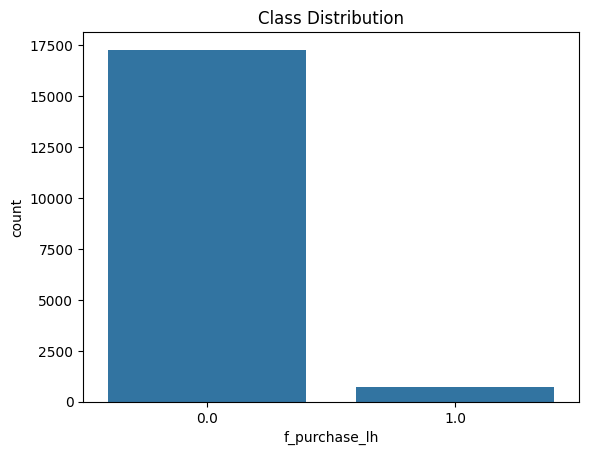

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# showing target variable class distribution
sns.countplot(x='f_purchase_lh', data=df)
plt.title('Class Distribution')
plt.show()

# data is highly unbalanced, with minority class 1

#### Data transformation

In [ ]:
# Check which columns have object data types
print(df.select_dtypes(include='object').columns.tolist())

# Drop clntnum, ctrycode and date columns
df = df.drop(columns=['clntnum', 'min_occ_date', 'cltdob_fix', 'ctrycode_desc'])
df_columns_obj = df.select_dtypes(include='object').columns.tolist()

# fill missing obj values with mode
for title in df_columns_obj:
  df[title] = df[title].fillna(df[title].mode()[0])

### Manually change the object datatypes to integers / floats types
# all ape/sumins/prempaid > float
to_float = [col for col in df.columns if 'ape' in col or 'sumins' in col or 'prempaid' in col]
df[to_float] = df[to_float].astype(float)

# all n_months, hh_20, pop_20 > int
to_int = [col for col in df.columns if 'n_months' in col]
to_int.extend(['hh_20','pop_20'])
df[to_int] = df[to_int].astype('int64')

# race, clnt type, stat, sex > nominal, one hot encoding
to_one_hot = ['race_desc', 'clttype', 'stat_flag', 'cltsex_fix']
df = pd.get_dummies(df, columns=to_one_hot)

# hh_size, annual income > ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
to_ordinal = ['hh_size_est', 'annual_income_est']
categories = [['0','1', '2', '3', '4', '>4'], ['E.BELOW30K','D.30K-60K','C.60K-100K' ,'B.100K-200K','A.ABOVE200K']]
encoder = OrdinalEncoder(categories=categories)
df[to_ordinal] = encoder.fit_transform(df[to_ordinal])

['clntnum', 'race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date', 'cltdob_fix', 'cltsex_fix', 'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est', 'ape_gi_42e115', 'ape_ltc_1280bf', 'ape_grp_6fc3e6', 'ape_grp_de05ae', 'ape_inv_dcd836', 'ape_grp_945b5a', 'ape_grp_6a5788', 'ape_ltc_43b9d5', 'ape_grp_9cdedf', 'ape_lh_d0adeb', 'ape_grp_1581d7', 'ape_grp_22decf', 'ape_lh_507c37', 'ape_lh_839f8a', 'ape_inv_e9f316', 'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_grp_caa6ff', 'ape_grp_fd3bfb', 'ape_lh_e22a6a', 'ape_grp_70e1dd', 'ape_grp_e04c3a', 'ape_grp_fe5fb8', 'ape_gi_856320', 'ape_grp_94baec', 'ape_gi_058815', 'ape_grp_e91421', 'ape_lh_f852af', 'ape_lh_947b15', 'ape_32c74c', 'sumins_gi_42e115', 'sumins_ltc_1280bf', 'sumins_grp_6fc3e6', 'sumins_grp_de05ae', 'sumins_inv_dcd836', 'sumins_grp_945b5a', 'sumins_grp_6a5788', 'sumins_ltc_43b9d5', 'sumins_grp_9cdedf', 'sumins_lh_d0adeb', 'sumins_grp_1581d7', 'sumins_grp_22decf', 'sumins_lh_507c37', 'sumins_inv_e9f316', 'sumins_gi_a10d1b',

In [ ]:
df.info()
# check that no more object data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17992 entries, 19550 to 15795
Columns: 226 entries, flg_substandard to cltsex_fix_Male
dtypes: float64(134), int64(80), uint8(12)
memory usage: 29.7 MB


In [ ]:
# Identifiy numeric columns and fill null values with the median value
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

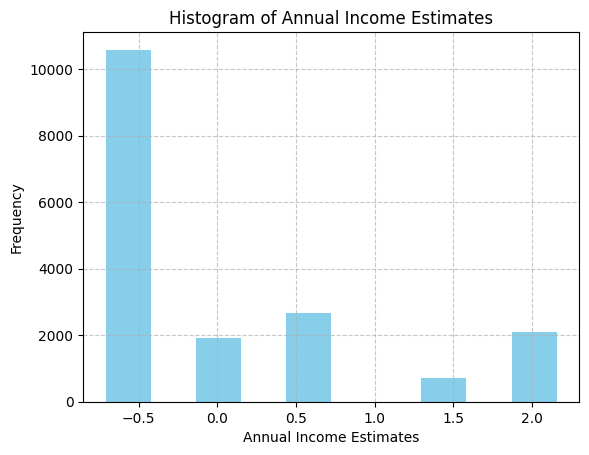

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'value' column
df['annual_income_est'].hist(color = "skyblue")

plt.title("Histogram of Annual Income Estimates")
plt.xlabel("Annual Income Estimates")
plt.ylabel("Frequency")

plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## 2. Data Selection

### 2.1 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

##### THIS ONE I NOT SURE?? DO WE STANDARDISE ALL COLUMNS OR JUST THE NUMERICAL ONES

In [ ]:
## tried to remove the ordinal columns before standardising the rest but it created a lot of NaN values

df_copy = df.copy(deep=True)
to_std = df_copy.drop(to_ordinal, axis = 1) #remove ordinal columns

# Standardize numerical columns
scaler = StandardScaler()
std_df_copy = scaler.fit_transform(to_std)
df_copy_std = pd.DataFrame(std_df_copy, columns=to_std.columns)

# Concatenate standardized numerical columns with original ordinal columns
df_copy_final = pd.concat([df_copy_std, df_copy[to_ordinal]], axis=1)

df_copy_final = df_copy_final.dropna() #I JUST DROPPED THE NA VALUES BC i tried many other things n it did not work i couldnt get rid of the NaNs so i gave up

### 2.2 Feature Selection

#### 2.2.1 Select K-Best

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=5)

selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['is_valid_dm', 'is_valid_email', 'n_months_last_bought_products',
       'f_ever_bought_gi', 'n_months_last_bought_gi'],
      dtype='object')


#### 2.2.2 XGBoost

In [ ]:
import xgboost as xgb
XGBmodel = xgb.XGBClassifier()

XGBmodel.fit(X, y)
feature_importance_scores = XGBmodel.feature_importances_
feature_ranking = np.argsort(feature_importance_scores)[::-1]
selected_features = X.columns[feature_ranking[:5]]

print("Selected feature names:", selected_features)

Selected feature names: Index(['is_valid_email', 'n_months_last_bought_gi', 'f_mindef_mha', 'f_retail',
       'prempaid_grp_94baec'],
      dtype='object')


#### 2.2.3 Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=20, random_state=42, class_weight= 'balanced')

RFmodel.fit(X, y)
RFfeature_importances = RFmodel.feature_importances_
RFtop_features = X.columns[np.argsort(RFfeature_importances)[::-1]][:5]

print("Selected feature names:", RFtop_features)

Selected feature names: Index(['f_ever_bought_gi', 'n_months_last_bought_gi',
       'n_months_last_bought_products', 'hh_size', 'pop_20'],
      dtype='object')


#### 2.2.4 Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca_initial = PCA()
pca_initial.fit(df)
explained_variance = pca_initial.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(n_components)

pca = PCA(n_components)
df_pca = pca.fit_transform(df)
n_pcs= pca.n_components_ # get number of components
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

75
['sumins_839f8a', 'n_months_last_bought_ltc_43b9d5', 'ape_ltc', 'ape_e22a6a', 'f_ever_bought_c4bda5', 'f_ever_bought_c4bda5', 'prempaid_507c37', 'sumins_ltc', 'prempaid_lh_839f8a', 'sumins_lh_f852af', 'clttype_P', 'sumins_grp_de05ae', 'ape_lh_507c37', 'ape_lh_507c37', 'stat_flag_ACTIVE', 'is_consent_to_mail', 'ape_grp_22decf', 'sumins_inv_e9f316', 'ape_grp_94baec', 'hh_size', 'sumins_inv_e9f316', 'prempaid_grp_945b5a', 'cltsex_fix_Female', 'race_desc_Chinese', 'cltsex_fix_Female', 'prempaid_grp_94baec', 'sumins_inv_e9f316', 'ape_grp_70e1dd', 'race_desc_Chinese', 'hh_20', 'ape_grp_6fc3e6', 'n_months_last_bought_grp_e04c3a', 'hh_20', 'prempaid_grp_caa6ff', 'ape_lh_947b15', 'n_months_last_bought_grp_e04c3a', 'flg_is_returned_mail', 'flg_is_revised_term', 'is_housewife_retiree', 'race_desc_Indian', 'race_desc_Others', 'flg_latest_being_cancel', 'clttype_C', 'sumins_grp_fe5fb8', 'stat_flag_MATURED', 'race_desc_Malay', 'flg_is_proposal', 'sumins_grp_fe5fb8', 'flg_has_life_claim', 'flg_is_

**Splitting Dataset to Training and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print('Before:', Counter(y_train))

Before: Counter({0.0: 13809, 1.0: 584})


**Finalizing Selected Features**

In [ ]:
# Finalizing selected features (selected based on consistency across methods and domain knowledge)
selected = ["n_months_last_bought_gi",
                  "is_valid_email",
                  "n_months_last_bought_products",
                  "f_ever_bought_gi",
                  "is_valid_dm",
                  "f_mindef_mha",
                  "f_retail",
                  "hh_size",
                  "pop_20" ]
X_train = X_train[selected]

# not sure if we should select so many so it can be changed

In [ ]:
X_val = X_val[selected]

**Correlation Matrix of Selected Features and Target Variable**

In [ ]:
df2= X_train
df2["f_purchase_1h"] = y_train

<ipython-input-27-ac38d2ee89ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["f_purchase_1h"] = y_train


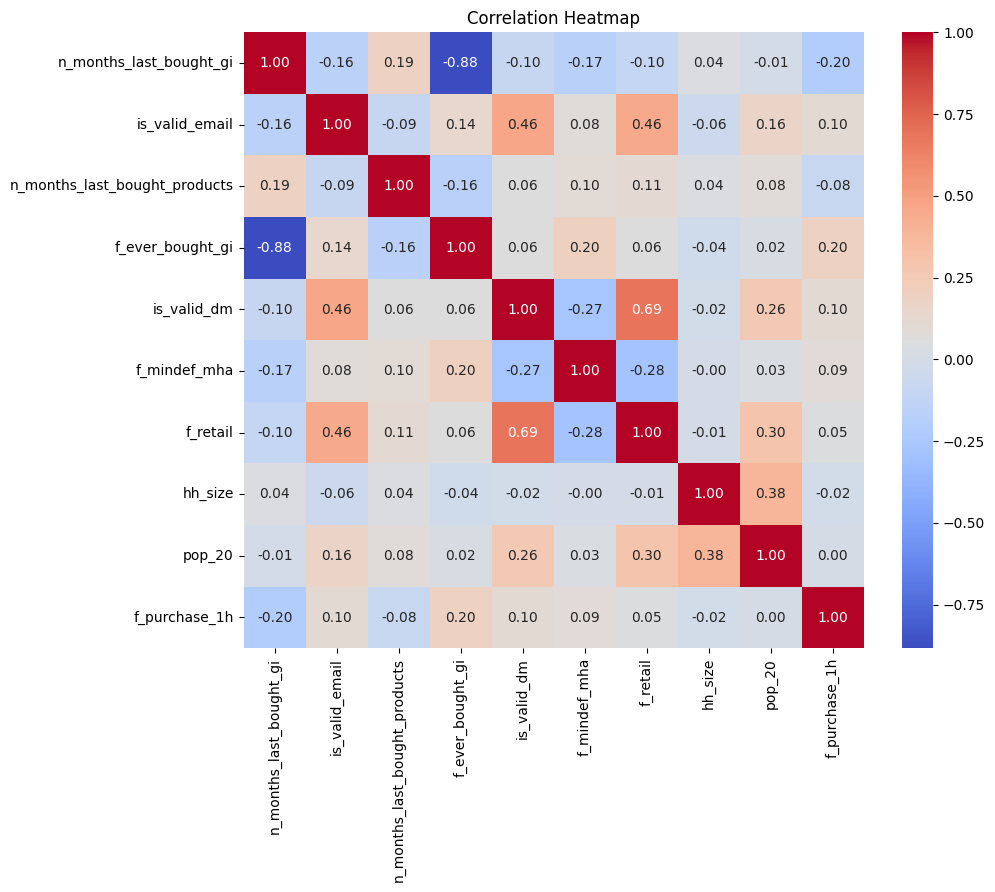

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, we see that features like n_months_last_bought_gi, and f_ever_bouht_gi seem to be a little more strongly correlated to the target variable f_purchase_1h, as compared to the other features.

We also noticed strong correlation between f_ever_bought_gi, and n_months_last_bought_gi which could suggest a possible synergy effect between the two features.

We shall be exploring the features and their relevance in predicting the target variable through various modelling techniques below.

### Data Visualisation

### 2.3 Oversampling minority

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# SMOTE on training set only

X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After:', Counter(y_train))

After: Counter({1.0: 13809, 0.0: 13809})
